# Lab 9 Task 2

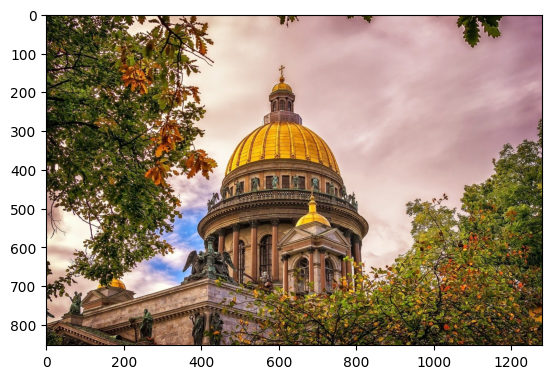

In [47]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
import cv2

random_state = 14 

img = cv2.imread('spb_st_isaacs.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [48]:
print('2.1:', img.mean())
img = img.astype('float')
img /= 255
print('2.2:', img.mean())

2.1: 123.05771846912856
2.2: 0.48257928811422945


In [49]:
flat_img = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
km = MiniBatchKMeans(n_clusters=16, random_state=random_state)
km.fit(flat_img)

c:\Users\dmitr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=16, random_state=14)

In [50]:
new_flat_img = []

for i in km.labels_:
    new_flat_img.append(km.cluster_centers_[i])

new_flat_img = np.array(new_flat_img)

print('2.3:', new_flat_img.mean())

2.3: 0.4818352725880304


2.4: Здесь график вообще не нужен, просто выбирайте вариант, где нету "градиента" и цвета резко меняются, как показано здесь


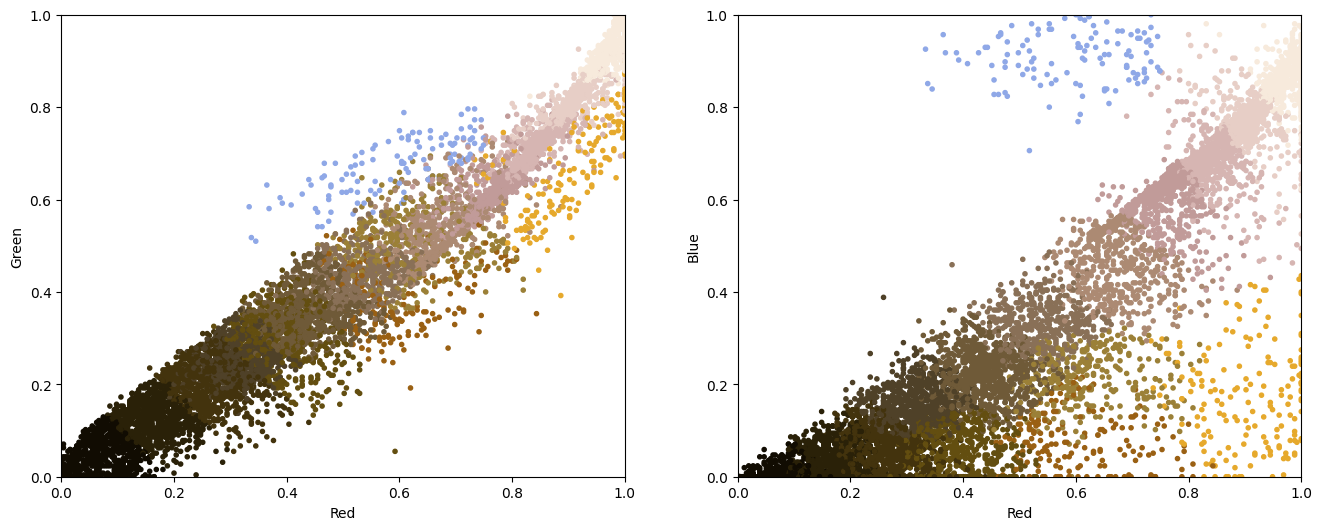

In [51]:
def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

plot_pixels(flat_img, new_flat_img)

print('2.4:', 'Здесь график вообще не нужен, просто выбирайте вариант, где нету "градиента" и цвета резко меняются, как показано здесь')

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 20)
axs[0].imshow(img)
axs[0].set_title('Original image')
axs[1].imshow(new_flat_img.reshape(img.shape))
axs[1].set_title('Minified image')

2.5: Честно, не понял какой там порядок цветов на платформе, просто выберите тот, в котором все эти цвета есть


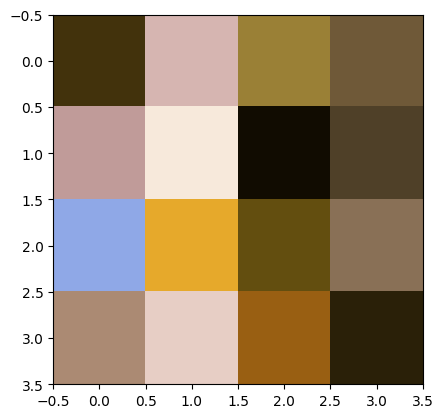

In [59]:
sorted_colors = km.cluster_centers_.copy()
plt.imshow(sorted_colors.reshape((4, 4, 3)))
print('2.5:', 'Честно, не понял какой там порядок цветов на платформе, просто выберите тот, в котором все эти цвета есть')